#  Homework 1
### Name: Yuqian Wang, Jihan Gao
### Course: CMSC320
### Instructor: John Dickerson

## Part 1: Data scraping and preparation

### Step 1: Scrape your competitor’s data

In [2]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares" )
r.status_code  #returns 200 when succeed
root = BeautifulSoup(r.content, 'lxml')
table = root.find("table")

import pandas as pd
d=pd.read_html(table.prettify())     #read_html function returns a list of dataframes
d[0].columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']  #set appropriate names
d[0].index = range(1,51)   #index all rows
print(d[0])

    rank x_classification        date  region start_time maximum_time  \
1      1            X28.0  2003/11/04     486      19:29        19:53   
2      2            X20.0  2001/04/02    9393      21:32        21:51   
3      3            X17.2  2003/10/28     486      09:51        11:10   
4      4            X17.0  2005/09/07     808      17:17        17:40   
5      5            X14.4  2001/04/15    9415      13:19        13:50   
6      6            X10.0  2003/10/29     486      20:37        20:49   
7      7             X9.4  1997/11/06    8100      11:49        11:55   
8      8             X9.0  2006/12/05     930      10:18        10:35   
9      9             X8.3  2003/11/02     486      17:03        17:25   
10    10             X7.1  2005/01/20     720      06:36        07:01   
11    11             X6.9  2011/08/09    1263      07:48        08:05   
12    12             X6.5  2006/12/06     930      18:29        18:47   
13    13             X6.2  2005/09/09     808      

##### In step1, we parsed a html table and created a dataframe from the website by using BeautifulSoup and pandas. We named all the columns with appropriate names.

### Step 2: Tidy the top 50 solar flare data

In [3]:
del d[0]['movie']
import datetime as dt
from datetime import datetime
   
d[0]['start_time'] = pd.to_datetime(d[0]['date'] + ' ' + d[0]['start_time'])  #change it into datetime format
d[0]['maximum_time'] = pd.to_datetime(d[0]['date'] + ' ' + d[0]['maximum_time'])
d[0]['end_time'] = pd.to_datetime(d[0]['date'] + ' ' + d[0]['end_time'])
del d[0]['date']
d[0].columns = ['rank', 'x_classification', 'region', 'start_datetime', 'max_datetime', 'end_datetime'] 
cols = d[0].columns.tolist()
cols = [col for col in d[0] if col != 'region'] + ['region']   #rearranging columns
d[0] = d[0][cols]
import numpy as np
d[0] = d[0].replace('-', np.NaN)    #mark missing values as NaN
print(d[0])

    rank x_classification      start_datetime        max_datetime  \
1      1            X28.0 2003-11-04 19:29:00 2003-11-04 19:53:00   
2      2            X20.0 2001-04-02 21:32:00 2001-04-02 21:51:00   
3      3            X17.2 2003-10-28 09:51:00 2003-10-28 11:10:00   
4      4            X17.0 2005-09-07 17:17:00 2005-09-07 17:40:00   
5      5            X14.4 2001-04-15 13:19:00 2001-04-15 13:50:00   
6      6            X10.0 2003-10-29 20:37:00 2003-10-29 20:49:00   
7      7             X9.4 1997-11-06 11:49:00 1997-11-06 11:55:00   
8      8             X9.0 2006-12-05 10:18:00 2006-12-05 10:35:00   
9      9             X8.3 2003-11-02 17:03:00 2003-11-02 17:25:00   
10    10             X7.1 2005-01-20 06:36:00 2005-01-20 07:01:00   
11    11             X6.9 2011-08-09 07:48:00 2011-08-09 08:05:00   
12    12             X6.5 2006-12-06 18:29:00 2006-12-06 18:47:00   
13    13             X6.2 2005-09-09 19:13:00 2005-09-09 20:04:00   
14    14             X6.2 2001-12-

##### In step 2 we cleaned the data by changing the time into datatime format, dropping some useless columns and finding all missing values and set them to NaN.

### Step 3. Scrape the NASA data

In [4]:
r2 = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html" )
r2.status_code  
root2 = BeautifulSoup( r2.content, 'lxml' )
text = root2.get_text()         #get a string out from the website when there is no html table
lines = text.split('\n')[15:-4]      #split lines by '\n' and only extract the useful lines

list_new = []
for line in lines:
    list_new.append(line.split()[0:14])    #split data

d2 = pd.DataFrame(list_new)       #creating a new DataFrame
print(d2)

             0      1      2      3      4      5        6      7     8   \
0    1997/04/01  14:00  04/01  14:15   8000   4000   S25E16   8026  M1.3   
1    1997/04/07  14:30  04/07  17:30  11000   1000   S28E19   8027  C6.8   
2    1997/05/12  05:15  05/14  16:00  12000     80   N21W08   8038  C1.3   
3    1997/05/21  20:20  05/21  22:00   5000    500   N05W12   8040  M1.3   
4    1997/09/23  21:53  09/23  22:16   6000   2000   S29E25   8088  C1.4   
5    1997/11/03  05:15  11/03  12:00  14000    250   S20W13   8100  C8.6   
6    1997/11/03  10:30  11/03  11:30  14000   5000   S16W21   8100  M4.2   
7    1997/11/04  06:00  11/05  04:30  14000    100   S14W33   8100  X2.1   
8    1997/11/06  12:20  11/07  08:30  14000    100   S18W63   8100  X9.4   
9    1997/11/27  13:30  11/27  14:00  14000   7000   N17E63   8113  X2.6   
10   1997/12/12  22:45  12/12  23:20  14000   8000   N25W52   8116  B9.4   
11   1998/01/25  15:03  01/25  15:18  14000  10000   N21E25   8141  C1.1   
12   1998/03

##### We got data from NASA website, parse it and form a new DataFrame. We mainly used the split() method.

### Step 4: Tidy the NASA the table

In [5]:
#replacing all missing values with NaN
d2.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date','cme_time', 'cme_angle', 'cme_width', 'cme_speed']
d2['start_frequency'] = d2['start_frequency'].replace('????', np.NaN)
d2['end_frequency'] = d2['end_frequency'].replace('????', np.NaN)
d2['flare_location'] = d2['flare_location'].replace('------',np.NaN)
d2['flare_region'] = d2['flare_region'].replace('-----',np.NaN)
d2['flare_classification'] = d2['flare_classification'].replace('----',np.NaN)
d2['flare_classification'] = d2['flare_classification'].replace('FILA',np.NaN)
d2['cme_date'] = d2['cme_date'].replace('--/--',np.NaN)
d2['cme_time'] = d2['cme_time'].replace('--:--',np.NaN)
d2['cme_angle'] = d2['cme_angle'].replace('----',np.NaN)
d2['cme_width'] = d2['cme_width'].replace('----',np.NaN)
d2['cme_width'] = d2['cme_width'].replace('---',np.NaN)
d2['cme_speed'] = d2['cme_speed'].replace('----',np.NaN)


#add two columns to the df. 'is_halo' column gives True if cme_angle is Halo and False otherwise.
d2['is_halo'] = (d2['cme_angle'] == 'Halo')
d2['cme_angle'] = d2['cme_angle'].replace('Halo','NA')

#'width_lower_bound gives true if cme_width is given with a lower bound instead of a exact number
d2['width_lower_bound'] = d2['cme_width'].apply(lambda x : type(x) is str and x[0] == '>')
d2['cme_width'] = d2['cme_width'].apply(lambda x : x.replace('>','') if (type(x) is str) else x)

#change into datetime
d2['start_datetime'] = pd.to_datetime(d2['start_date'] + ' ' + d2['start_time'])


from datetime import timedelta

list = d2['start_datetime'].apply(lambda x : str(x.year))    #list stores an array of years
end_column = []      
for index, line in d2.iterrows():
    if line['end_time'] == '24:00':     #if time is 24:00 turn it into 00:00 and day + 1
        line['end_time'] = '00:00'
        end_column.append(pd.to_datetime(list[index] + '/' + line['end_date'] + ' ' + line['end_time']))
        end_column[index] += timedelta(days = 1)
    else:
        end_column.append(pd.to_datetime(list[index] + '/' + line['end_date'] + ' ' + line['end_time']))

d2['end_datetime'] = end_column
d2['cme_datetime'] = pd.to_datetime(list + '/' + d2['cme_date'] + ' ' + d2['cme_time'])
del d2['start_time']
del d2['start_date']
del d2['end_time']
del d2['end_date']
del d2['cme_time']
del d2['cme_date']
d2 = d2[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location',
         'flare_region', 'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed', 
         'is_halo', 'width_lower_bound']]     #rearrange sequence of columns
print(d2)

         start_datetime        end_datetime start_frequency end_frequency  \
0   1997-04-01 14:00:00 1997-04-01 14:15:00            8000          4000   
1   1997-04-07 14:30:00 1997-04-07 17:30:00           11000          1000   
2   1997-05-12 05:15:00 1997-05-14 16:00:00           12000            80   
3   1997-05-21 20:20:00 1997-05-21 22:00:00            5000           500   
4   1997-09-23 21:53:00 1997-09-23 22:16:00            6000          2000   
5   1997-11-03 05:15:00 1997-11-03 12:00:00           14000           250   
6   1997-11-03 10:30:00 1997-11-03 11:30:00           14000          5000   
7   1997-11-04 06:00:00 1997-11-05 04:30:00           14000           100   
8   1997-11-06 12:20:00 1997-11-07 08:30:00           14000           100   
9   1997-11-27 13:30:00 1997-11-27 14:00:00           14000          7000   
10  1997-12-12 22:45:00 1997-12-12 23:20:00           14000          8000   
11  1998-01-25 15:03:00 1998-01-25 15:18:00           14000         10000   

##### Tidy the table, changed time into datetime format, added two new columns, etc.

## Part 2: Analysis

### Question 1: Replication

In [6]:

d3 = pd.DataFrame(d2)
float_class = []
for index,line in d2.iterrows():
    #print(line['flare_classification'])
    if isinstance(line['flare_classification'], str):   #change the type of 'flare_classification' from str to float
        if line['flare_classification'][0] == 'X':
            float_class.append(0.0001 * float(line['flare_classification'][1:]))
        elif line['flare_classification'][0] == 'B':
            float_class.append(0.0000001 * float(line['flare_classification'][1:]))
        elif line['flare_classification'][0] == 'C':
            float_class.append(0.000001 * float(line['flare_classification'][1:]))
        elif line['flare_classification'][0] == 'M':
            float_class.append(0.00001 * float(line['flare_classification'][1:]))
    else:
        float_class.append(0)



   
d3['float_class'] = float_class      #add the column into df and sort it by this value
d3 = d3.sort_values(['float_class'], ascending = False)      
  
d4 = pd.DataFrame(d3[0:50])       #get the first 50 rows
print(d4)
   


         start_datetime        end_datetime start_frequency end_frequency  \
242 2003-11-04 20:00:00 2003-11-05 00:00:00           10000           200   
119 2001-04-02 22:05:00 2001-04-03 02:30:00           14000           250   
234 2003-10-28 11:10:00 2003-10-30 00:00:00           14000            40   
128 2001-04-15 14:05:00 2001-04-16 13:00:00           14000            40   
235 2003-10-29 20:55:00 2003-10-30 00:00:00           11000           500   
8   1997-11-06 12:20:00 1997-11-07 08:30:00           14000           100   
330 2006-12-05 10:50:00 2006-12-05 20:00:00           14000           250   
238 2003-11-02 17:30:00 2003-11-03 01:00:00           12000           250   
290 2005-01-20 07:15:00 2005-01-20 16:30:00           14000            25   
360 2011-08-09 08:20:00 2011-08-09 08:35:00           16000          4000   
333 2006-12-06 19:00:00 2006-12-09 00:00:00           16000            30   
319 2005-09-09 19:45:00 2005-09-09 22:00:00           10000            50   

 ##### We sorted the dataframe by flare_classification. In order to achieve it, we first convert the type of flare_classification from str to float. After extracting the top 50 rows and comparing it with d[0] (the dataframe we get from step1), we find they are not the same. Hence, the two dataset cannot replicate each other. 

### Question 2: Integration

In [7]:
float_d0 = []
for index,line in d[0].iterrows():
    if isinstance(line['x_classification'], str):
        if line['x_classification'][0] == 'X':
            float_d0.append(0.0001 * float(line['x_classification'][1:]))
        elif line['x_classification'][0] == 'B':
            float_d0.append(0.0000001 * float(line['x_classification'][1:]))
        elif line['x_classification'][0] == 'C':
            float_d0.append(0.000001 * float(line['x_classification'][1:]))
        elif line['x_classification'][0] == 'M':
            float_d0.append(0.00001 * float(line['x_classification'][1:]))
    else:
        float_d0.append(0)

d[0]['float_class'] = float_d0



d5 = pd.DataFrame(d2)

d5['rank'] = 'None'
for index, line in d[0].iterrows():
    abs_diff = []
    for index2, line2 in d5.iterrows():
        if  np.isnan(line2['float_class']) == False and line2['float_class'] != 'FILA':
            abs_diff.append(abs(line['float_class'] - line2['float_class']))
    
    d5['abs_diff'] = abs_diff
    total = []
    for index4, line4 in d5.iterrows():
        total_seconds= (line['start_datetime'] - line4['start_datetime']).total_seconds() + (line['end_datetime'] - line4['end_datetime']).total_seconds() + (line['max_datetime'] - line4['cme_datetime']).total_seconds()
        total.append(total_seconds)
    
    
    d5['total'] = total_seconds
    d5 = d5.sort(['abs_diff','total'])
    d5.index=range(len(d5))
    if d5['rank'][0] == 'None':
        d5['rank'][0] = str(line['rank'])
    else:
        d5['rank'][0] += ', ' + str(line['rank'])
        
print(d5)

    

C:\Users\jihan\anaconda\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\jihan\anaconda\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jihan\anaconda\lib\site-packages\ipykernel\__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


         start_datetime        end_datetime start_frequency end_frequency  \
0   2004-11-10 02:25:00 2004-11-10 03:40:00           14000          1000   
1   1997-11-27 13:30:00 1997-11-27 14:00:00           14000          7000   
2   2001-09-24 10:45:00 2001-09-25 20:00:00            7000            30   
3   2005-01-15 23:00:00 2005-01-15 00:00:00            3000            40   
4   2000-06-06 15:20:00 2000-06-08 09:00:00           14000            40   
5   2000-11-24 15:25:00 2000-11-24 22:00:00           14000           200   
6   2001-04-10 05:24:00 2001-04-11 00:00:00           14000           100   
7   1998-05-06 08:25:00 1998-05-06 08:35:00           14000          5000   
8   2003-11-03 01:15:00 2003-11-03 01:25:00            3000          1500   
9   2013-05-13 16:15:00 2013-05-13 19:10:00           16000           300   
10  2011-02-15 02:10:00 2011-02-15 07:00:00           16000           400   
11  1997-11-04 06:00:00 1997-11-05 04:30:00           14000           100   

##### When we were finding the best match for each row, we made a criteria based on four variables. flare_classification has the highest priority and then the difference in start_datetime, max_datetime and end_datetime. The latter three are of equal importance. So we first added a column(abs_diff) of differences in flare_classification and then a column(total) of sum of differences in time. We then sorted the dataframe first by abs_diff and then total in ascending order. The first row is thus the best match. There are cases when two or more lines in the first dataframe match to the same row in the other. In order not to overwite the rank, we mark all  of them in the cell. 

### Question 3: Analysis

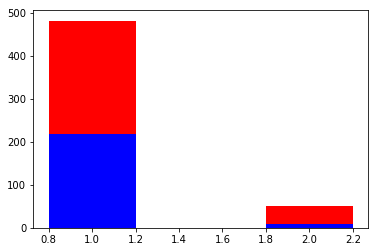

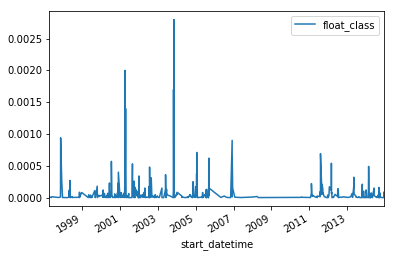

In [8]:
import matplotlib.pyplot as plt

count = 0
for index,line in d2.iterrows():
    if line['is_halo']:
        count += 1
    


count2 = 0
for index,line in d4.iterrows():
    if line['is_halo']:
        count2 += 1
    

 
a = (1, 2)
x = [count, count2]
y = [len(d2) - count, len(d4) - count2]
plt.bar(a, y, color="blue", width = 0.4, label = 'Non-halo')
plt.bar(a, x, color = 'red', bottom = y, width = 0.4, label = 'halo')

plt.show()

d2 = d2.sort_values('start_datetime')
d2.plot(x = 'start_datetime', y = 'float_class')

plt.show()



##### We made a bar graph and a plot. The bar graph shows the number of Halo CMEs in the top 50 flares vs. the dataset as a whole. The plot is flare_classification vs. start_datetime. We can see from the bar graph that more 'halo' occur in top 50 flares, which takes the majority, while in the whole dataset it takes roughly half and half. In the plot, we see that higher flare_classification tend to cluster in time. Some years appear to be more active than others. 